In [1]:
# importing necessary libraries

# for dataframes

import numpy as np
import pandas as pd

#for ignoring warnings
import warnings
warnings.filterwarnings("ignore")


import json
import glob
import os


# for visualisation of data
import seaborn as sns
import matplotlib.pyplot as plt

#importing the open cv
import cv2

#importing the tensor flow
import tensorflow as tf

# importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

import keras   # for buidling the model
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout    # different layers of cnn
from keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report,confusion_matrix

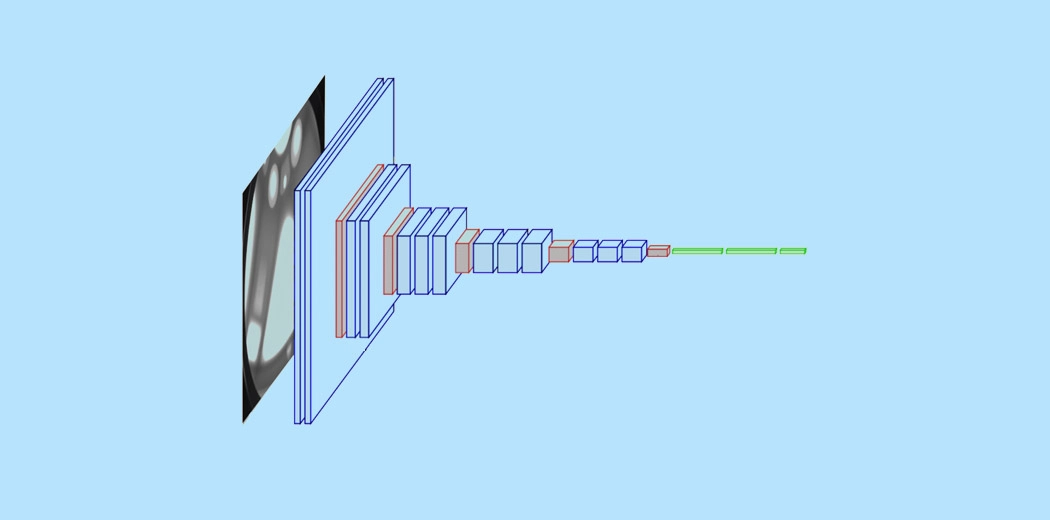

In [2]:
labels = ["angry","disgust","fear","happy","neutral","sad","surprise"]
img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [3]:
# fetching the training and testing data

train = get_data('C:/Users/YUVA RAVI/Face emotion recognition - DL/1. Raw dataset/train')
val = get_data('C:/Users/YUVA RAVI/Face emotion recognition - DL/1. Raw dataset/test')

In [4]:
train.shape

(28709, 2)

In [5]:
val.shape

(7178, 2)

In [6]:
for i in labels:
    print(labels.index(i),'--->',str(i))

0 ---> angry
1 ---> disgust
2 ---> fear
3 ---> happy
4 ---> neutral
5 ---> sad
6 ---> surprise


In [7]:
train[0]

array([array([[[ 50,  50,  50],
               [ 50,  50,  50],
               [ 49,  49,  49],
               ...,
               [ 88,  88,  88],
               [ 86,  86,  86],
               [ 86,  86,  86]],

              [[ 50,  50,  50],
               [ 50,  50,  50],
               [ 49,  49,  49],
               ...,
               [ 88,  88,  88],
               [ 86,  86,  86],
               [ 86,  86,  86]],

              [[ 50,  50,  50],
               [ 50,  50,  50],
               [ 50,  50,  50],
               ...,
               [ 88,  88,  88],
               [ 86,  86,  86],
               [ 86,  86,  86]],

              ...,

              [[104, 104, 104],
               [104, 104, 104],
               [104, 104, 104],
               ...,
               [ 85,  85,  85],
               [ 83,  83,  83],
               [ 83,  83,  83]],

              [[104, 104, 104],
               [104, 104, 104],
               [104, 104, 104],
               ...,
        

In [8]:
# the data set is huge to solve hence lets shuffle it.
# DL a strong in find sequence. Make it hard for find the sequence.
# randomise the sequence

import random
np.random.shuffle(train)


In [9]:
# Now we can randomly select a population of 6000 images
train[0]


array([array([[[253, 253, 253],
               [253, 253, 253],
               [253, 253, 253],
               ...,
               [190, 190, 190],
               [191, 191, 191],
               [191, 191, 191]],

              [[253, 253, 253],
               [253, 253, 253],
               [253, 253, 253],
               ...,
               [190, 190, 190],
               [191, 191, 191],
               [191, 191, 191]],

              [[253, 253, 253],
               [253, 253, 253],
               [253, 253, 253],
               ...,
               [189, 189, 189],
               [190, 190, 190],
               [190, 190, 190]],

              ...,

              [[170, 170, 170],
               [170, 170, 170],
               [171, 171, 171],
               ...,
               [185, 185, 185],
               [184, 184, 184],
               [184, 184, 184]],

              [[170, 170, 170],
               [170, 170, 170],
               [171, 171, 171],
               ...,
        

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X, X1 = train_test_split(train,test_size=0.750, random_state=300) # splitting randomly as we cannot run the whole due to memory error

In [12]:
X.shape

(7177, 2)

In [13]:
df=pd.DataFrame(train)

In [14]:
df.head()

,0,1
0,"[[[253, 253, 253], [253, 253, 253], [253, 253,...",3
1,"[[[149, 149, 149], [149, 149, 149], [149, 149,...",3
2,"[[[140, 140, 140], [140, 140, 140], [139, 139,...",0
3,"[[[79, 79, 79], [79, 79, 79], [79, 79, 79], [7...",2
4,"[[[71, 71, 71], [71, 71, 71], [70, 70, 70], [6...",2


In [15]:
df.columns

RangeIndex(start=0, stop=2, step=1)

In [16]:
df=df.rename(columns={0:'img_array',1:'labels'})

In [17]:
df.columns

Index(['img_array', 'labels'], dtype='object')

In [18]:
df.head()

,img_array,labels
0,"[[[253, 253, 253], [253, 253, 253], [253, 253,...",3
1,"[[[149, 149, 149], [149, 149, 149], [149, 149,...",3
2,"[[[140, 140, 140], [140, 140, 140], [139, 139,...",0
3,"[[[79, 79, 79], [79, 79, 79], [79, 79, 79], [7...",2
4,"[[[71, 71, 71], [71, 71, 71], [70, 70, 70], [6...",2


In [19]:
df.shape

(28709, 2)

In [20]:
df.size

57418

In [21]:
path='C:/Users/YUVA RAVI/Face emotion recognition - DL/1. Raw dataset/processed_data.csv'
df.to_csv(path)

In [22]:
df.head()

,img_array,labels
0,"[[[253, 253, 253], [253, 253, 253], [253, 253,...",3
1,"[[[149, 149, 149], [149, 149, 149], [149, 149,...",3
2,"[[[140, 140, 140], [140, 140, 140], [139, 139,...",0
3,"[[[79, 79, 79], [79, 79, 79], [79, 79, 79], [7...",2
4,"[[[71, 71, 71], [71, 71, 71], [70, 70, 70], [6...",2


<AxesSubplot:xlabel='labels'>

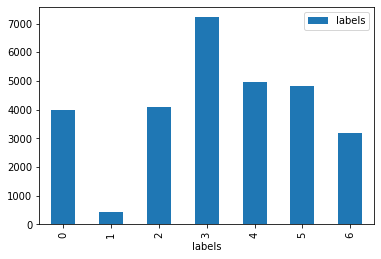

In [34]:
df.groupby('labels').agg({'labels':'count'}).plot(kind='bar')

In [35]:
df.shape

(28709, 2)

In [37]:
df['img_array'][0]/255  # checking for the normalization

array([[[0.99215686, 0.99215686, 0.99215686],
        [0.99215686, 0.99215686, 0.99215686],
        [0.99215686, 0.99215686, 0.99215686],
        ...,
        [0.74509804, 0.74509804, 0.74509804],
        [0.74901961, 0.74901961, 0.74901961],
        [0.74901961, 0.74901961, 0.74901961]],

       [[0.99215686, 0.99215686, 0.99215686],
        [0.99215686, 0.99215686, 0.99215686],
        [0.99215686, 0.99215686, 0.99215686],
        ...,
        [0.74509804, 0.74509804, 0.74509804],
        [0.74901961, 0.74901961, 0.74901961],
        [0.74901961, 0.74901961, 0.74901961]],

       [[0.99215686, 0.99215686, 0.99215686],
        [0.99215686, 0.99215686, 0.99215686],
        [0.99215686, 0.99215686, 0.99215686],
        ...,
        [0.74117647, 0.74117647, 0.74117647],
        [0.74509804, 0.74509804, 0.74509804],
        [0.74509804, 0.74509804, 0.74509804]],

       ...,

       [[0.66666667, 0.66666667, 0.66666667],
        [0.66666667, 0.66666667, 0.66666667],
        [0.67058824, 0

In [39]:
df['img_array']=[df['img_array'][i]/255 for i in range(0,len(df['img_array']))] # Normalization of whole data set

MemoryError: Unable to allocate 1.15 MiB for an array with shape (224, 224, 3) and data type float64

In [40]:
def normalize(input_array):
    output=input_array/255
    return output

In [41]:
normalize(df['img_array'][0])

array([[[0.99215686, 0.99215686, 0.99215686],
        [0.99215686, 0.99215686, 0.99215686],
        [0.99215686, 0.99215686, 0.99215686],
        ...,
        [0.74509804, 0.74509804, 0.74509804],
        [0.74901961, 0.74901961, 0.74901961],
        [0.74901961, 0.74901961, 0.74901961]],

       [[0.99215686, 0.99215686, 0.99215686],
        [0.99215686, 0.99215686, 0.99215686],
        [0.99215686, 0.99215686, 0.99215686],
        ...,
        [0.74509804, 0.74509804, 0.74509804],
        [0.74901961, 0.74901961, 0.74901961],
        [0.74901961, 0.74901961, 0.74901961]],

       [[0.99215686, 0.99215686, 0.99215686],
        [0.99215686, 0.99215686, 0.99215686],
        [0.99215686, 0.99215686, 0.99215686],
        ...,
        [0.74117647, 0.74117647, 0.74117647],
        [0.74509804, 0.74509804, 0.74509804],
        [0.74509804, 0.74509804, 0.74509804]],

       ...,

       [[0.66666667, 0.66666667, 0.66666667],
        [0.66666667, 0.66666667, 0.66666667],
        [0.67058824, 0

In [42]:
df['img_array'].apply(normalize)

MemoryError: Unable to allocate 1.15 MiB for an array with shape (224, 224, 3) and data type float64

# Since we are unable to handle the number of images lets reduce the number as per classes

In [3]:
labels = ["angry","disgust","fear","happy","neutral","sad","surprise"]
img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [4]:
# fetching the training and testing data

train = get_data('C:/Users/YUVA RAVI/Face emotion recognition - DL/1. Raw dataset/train - Copy')
val = get_data('C:/Users/YUVA RAVI/Face emotion recognition - DL/1. Raw dataset/test - Copy')

In [5]:
train.shape

(3135, 2)

In [6]:
val.shape

(1236, 2)

In [7]:
for i in labels:
    print(labels.index(i),'--->',str(i))

0 ---> angry
1 ---> disgust
2 ---> fear
3 ---> happy
4 ---> neutral
5 ---> sad
6 ---> surprise


In [8]:
train[0] # before shuffle the intial values are

array([array([[[211, 211, 211],
               [211, 211, 211],
               [211, 211, 211],
               ...,
               [201, 201, 201],
               [201, 201, 201],
               [201, 201, 201]],

              [[211, 211, 211],
               [211, 211, 211],
               [211, 211, 211],
               ...,
               [201, 201, 201],
               [201, 201, 201],
               [201, 201, 201]],

              [[211, 211, 211],
               [211, 211, 211],
               [211, 211, 211],
               ...,
               [201, 201, 201],
               [201, 201, 201],
               [201, 201, 201]],

              ...,

              [[115, 115, 115],
               [115, 115, 115],
               [114, 114, 114],
               ...,
               [ 28,  28,  28],
               [ 28,  28,  28],
               [ 28,  28,  28]],

              [[115, 115, 115],
               [115, 115, 115],
               [114, 114, 114],
               ...,
        

In [9]:
# the data set is huge to solve hence lets shuffle it.
# DL a strong in find sequence. Make it hard for find the sequence.
# randomise the sequence

import random
np.random.shuffle(train)


In [10]:
train[0] # they are randomized entirely

array([array([[[ 56,  56,  56],
               [ 56,  56,  56],
               [ 57,  57,  57],
               ...,
               [ 23,  23,  23],
               [ 23,  23,  23],
               [ 23,  23,  23]],

              [[ 56,  56,  56],
               [ 56,  56,  56],
               [ 57,  57,  57],
               ...,
               [ 23,  23,  23],
               [ 23,  23,  23],
               [ 23,  23,  23]],

              [[ 56,  56,  56],
               [ 56,  56,  56],
               [ 57,  57,  57],
               ...,
               [ 23,  23,  23],
               [ 23,  23,  23],
               [ 23,  23,  23]],

              ...,

              [[ 75,  75,  75],
               [ 75,  75,  75],
               [ 76,  76,  76],
               ...,
               [204, 204, 204],
               [205, 205, 205],
               [205, 205, 205]],

              [[ 75,  75,  75],
               [ 75,  75,  75],
               [ 76,  76,  76],
               ...,
        

In [11]:
# Normalising the whole dataset
# train = train / 255 if this performed then the labels are also normalized which makes meaningless steps hence

In [12]:
type(train)

numpy.ndarray

<AxesSubplot:ylabel='count'>

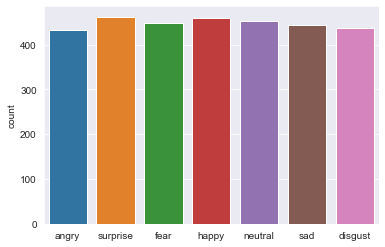

In [13]:
l = []
for i in train:
    
    if(i[1] == 0):
        l.append("angry")
    elif(i[1] == 1):
        l.append("disgust")
    elif(i[1] == 2):
        l.append("fear")
    elif(i[1] == 3):
        l.append("happy")
    elif(i[1] == 4):
        l.append("neutral")
    elif(i[1] == 5):
        l.append("sad")
    elif(i[1] == 6):
        l.append("surprise")
        
        
sns.set_style('darkgrid')
sns.countplot(l)  # almost all the data are equally distriubted

Text(0.5, 1.0, 'angry')

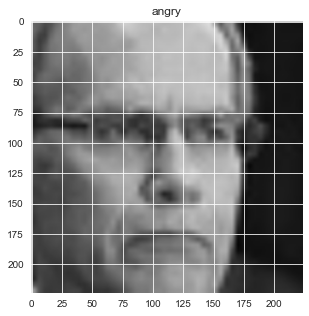

In [14]:
plt.figure(figsize = (5,5))
plt.imshow(train[1][0])
plt.title(labels[train[0][1]])

Text(0.5, 1.0, 'fear')

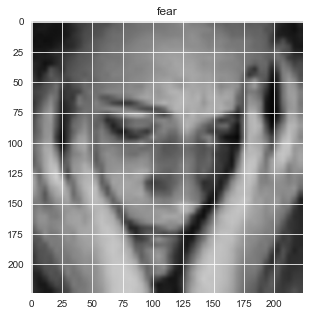

In [15]:
plt.figure(figsize = (5,5))
plt.imshow(train[-1][0])
plt.title(labels[train[-1][1]])

In [16]:
train[1][0] # my original data of pixels

array([[[ 99,  99,  99],
        [ 99,  99,  99],
        [ 99,  99,  99],
        ...,
        [ 20,  20,  20],
        [ 20,  20,  20],
        [ 20,  20,  20]],

       [[ 99,  99,  99],
        [ 99,  99,  99],
        [ 99,  99,  99],
        ...,
        [ 20,  20,  20],
        [ 20,  20,  20],
        [ 20,  20,  20]],

       [[ 99,  99,  99],
        [ 99,  99,  99],
        [ 99,  99,  99],
        ...,
        [ 20,  20,  20],
        [ 20,  20,  20],
        [ 20,  20,  20]],

       ...,

       [[151, 151, 151],
        [151, 151, 151],
        [149, 149, 149],
        ...,
        [ 36,  36,  36],
        [ 36,  36,  36],
        [ 36,  36,  36]],

       [[154, 154, 154],
        [154, 154, 154],
        [151, 151, 151],
        ...,
        [ 36,  36,  36],
        [ 36,  36,  36],
        [ 36,  36,  36]],

       [[154, 154, 154],
        [154, 154, 154],
        [151, 151, 151],
        ...,
        [ 36,  36,  36],
        [ 36,  36,  36],
        [ 36,  36,  36]]

In [17]:
#lets try to normalise one and output formal shall uint8

sample =train[1][0]  # sample dtype is unit8 checking after normalising

# (sample/255).dtype gives us float 64 output which blocks the calculation ahead and computationally difficult
normalized_sample=(sample/255).astype(np.float16)# if we use uint8 ,every data is nullified as their range in not float

#Half precision float: sign bit, 5 bits exponent, 10 bits mantissa = has been used to reduce the memory consumption
normalized_sample # in format of array

array([[[0.3882, 0.3882, 0.3882],
        [0.3882, 0.3882, 0.3882],
        [0.3882, 0.3882, 0.3882],
        ...,
        [0.0784, 0.0784, 0.0784],
        [0.0784, 0.0784, 0.0784],
        [0.0784, 0.0784, 0.0784]],

       [[0.3882, 0.3882, 0.3882],
        [0.3882, 0.3882, 0.3882],
        [0.3882, 0.3882, 0.3882],
        ...,
        [0.0784, 0.0784, 0.0784],
        [0.0784, 0.0784, 0.0784],
        [0.0784, 0.0784, 0.0784]],

       [[0.3882, 0.3882, 0.3882],
        [0.3882, 0.3882, 0.3882],
        [0.3882, 0.3882, 0.3882],
        ...,
        [0.0784, 0.0784, 0.0784],
        [0.0784, 0.0784, 0.0784],
        [0.0784, 0.0784, 0.0784]],

       ...,

       [[0.5923, 0.5923, 0.5923],
        [0.5923, 0.5923, 0.5923],
        [0.5845, 0.5845, 0.5845],
        ...,
        [0.1412, 0.1412, 0.1412],
        [0.1412, 0.1412, 0.1412],
        [0.1412, 0.1412, 0.1412]],

       [[0.604 , 0.604 , 0.604 ],
        [0.604 , 0.604 , 0.604 ],
        [0.5923, 0.5923, 0.5923],
        .

# Data Preprocessing and Data Augumentation

In [18]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)


In [19]:
x_train[0]  # training data set sample before normalization

array([[[ 56,  56,  56],
        [ 56,  56,  56],
        [ 57,  57,  57],
        ...,
        [ 23,  23,  23],
        [ 23,  23,  23],
        [ 23,  23,  23]],

       [[ 56,  56,  56],
        [ 56,  56,  56],
        [ 57,  57,  57],
        ...,
        [ 23,  23,  23],
        [ 23,  23,  23],
        [ 23,  23,  23]],

       [[ 56,  56,  56],
        [ 56,  56,  56],
        [ 57,  57,  57],
        ...,
        [ 23,  23,  23],
        [ 23,  23,  23],
        [ 23,  23,  23]],

       ...,

       [[ 75,  75,  75],
        [ 75,  75,  75],
        [ 76,  76,  76],
        ...,
        [204, 204, 204],
        [205, 205, 205],
        [205, 205, 205]],

       [[ 75,  75,  75],
        [ 75,  75,  75],
        [ 76,  76,  76],
        ...,
        [204, 204, 204],
        [205, 205, 205],
        [205, 205, 205]],

       [[ 75,  75,  75],
        [ 75,  75,  75],
        [ 77,  77,  77],
        ...,
        [204, 204, 204],
        [205, 205, 205],
        [205, 205, 205]]

In [20]:
x_val[0]  # validation set sample before normalization

array([[[231, 231, 231],
        [231, 231, 231],
        [231, 231, 231],
        ...,
        [233, 233, 233],
        [233, 233, 233],
        [233, 233, 233]],

       [[231, 231, 231],
        [231, 231, 231],
        [231, 231, 231],
        ...,
        [233, 233, 233],
        [233, 233, 233],
        [233, 233, 233]],

       [[231, 231, 231],
        [231, 231, 231],
        [231, 231, 231],
        ...,
        [233, 233, 233],
        [233, 233, 233],
        [233, 233, 233]],

       ...,

       [[218, 218, 218],
        [218, 218, 218],
        [218, 218, 218],
        ...,
        [186, 186, 186],
        [185, 185, 185],
        [185, 185, 185]],

       [[218, 218, 218],
        [218, 218, 218],
        [218, 218, 218],
        ...,
        [186, 186, 186],
        [185, 185, 185],
        [185, 185, 185]],

       [[218, 218, 218],
        [218, 218, 218],
        [218, 218, 218],
        ...,
        [186, 186, 186],
        [185, 185, 185],
        [185, 185, 185]]

In [21]:
x_train[0].reshape(-1, img_size, img_size, 1) # change the shape of training sample

array([[[[ 56],
         [ 56],
         [ 56],
         ...,
         [185],
         [186],
         [186]],

        [[186],
         [186],
         [186],
         ...,
         [187],
         [187],
         [186]],

        [[186],
         [186],
         [184],
         ...,
         [ 23],
         [ 23],
         [ 23]],

        ...,

        [[ 96],
         [ 96],
         [ 96],
         ...,
         [ 34],
         [ 34],
         [ 34]],

        [[ 70],
         [ 70],
         [ 70],
         ...,
         [167],
         [172],
         [172]],

        [[172],
         [176],
         [176],
         ...,
         [ 85],
         [ 85],
         [ 82]]],


       [[[ 82],
         [ 82],
         [ 80],
         ...,
         [ 31],
         [ 31],
         [ 31]],

        [[ 68],
         [ 68],
         [ 68],
         ...,
         [161],
         [167],
         [167]],

        [[167],
         [172],
         [172],
         ...,
         [ 73],
         [

In [22]:
(np.array(x_train[0]) / 255).astype(np.float16) # normalising and storing them as float 16

array([[[0.2196, 0.2196, 0.2196],
        [0.2196, 0.2196, 0.2196],
        [0.2235, 0.2235, 0.2235],
        ...,
        [0.0902, 0.0902, 0.0902],
        [0.0902, 0.0902, 0.0902],
        [0.0902, 0.0902, 0.0902]],

       [[0.2196, 0.2196, 0.2196],
        [0.2196, 0.2196, 0.2196],
        [0.2235, 0.2235, 0.2235],
        ...,
        [0.0902, 0.0902, 0.0902],
        [0.0902, 0.0902, 0.0902],
        [0.0902, 0.0902, 0.0902]],

       [[0.2196, 0.2196, 0.2196],
        [0.2196, 0.2196, 0.2196],
        [0.2235, 0.2235, 0.2235],
        ...,
        [0.0902, 0.0902, 0.0902],
        [0.0902, 0.0902, 0.0902],
        [0.0902, 0.0902, 0.0902]],

       ...,

       [[0.2942, 0.2942, 0.2942],
        [0.2942, 0.2942, 0.2942],
        [0.298 , 0.298 , 0.298 ],
        ...,
        [0.8   , 0.8   , 0.8   ],
        [0.8037, 0.8037, 0.8037],
        [0.8037, 0.8037, 0.8037]],

       [[0.2942, 0.2942, 0.2942],
        [0.2942, 0.2942, 0.2942],
        [0.298 , 0.298 , 0.298 ],
        .

In [23]:
# Normalize the data
x_train = (np.array(x_train) / 255).astype(np.float16)
x_val = (np.array(x_val) / 255).astype(np.float16)

In [24]:
# reshaping the array of  matrix
x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

In [25]:
x_train.shape

(3135, 224, 224, 3)

In [26]:
x_train[0]   # after normalization , lets check

array([[[0.2196, 0.2196, 0.2196],
        [0.2196, 0.2196, 0.2196],
        [0.2235, 0.2235, 0.2235],
        ...,
        [0.0902, 0.0902, 0.0902],
        [0.0902, 0.0902, 0.0902],
        [0.0902, 0.0902, 0.0902]],

       [[0.2196, 0.2196, 0.2196],
        [0.2196, 0.2196, 0.2196],
        [0.2235, 0.2235, 0.2235],
        ...,
        [0.0902, 0.0902, 0.0902],
        [0.0902, 0.0902, 0.0902],
        [0.0902, 0.0902, 0.0902]],

       [[0.2196, 0.2196, 0.2196],
        [0.2196, 0.2196, 0.2196],
        [0.2235, 0.2235, 0.2235],
        ...,
        [0.0902, 0.0902, 0.0902],
        [0.0902, 0.0902, 0.0902],
        [0.0902, 0.0902, 0.0902]],

       ...,

       [[0.2942, 0.2942, 0.2942],
        [0.2942, 0.2942, 0.2942],
        [0.298 , 0.298 , 0.298 ],
        ...,
        [0.8   , 0.8   , 0.8   ],
        [0.8037, 0.8037, 0.8037],
        [0.8037, 0.8037, 0.8037]],

       [[0.2942, 0.2942, 0.2942],
        [0.2942, 0.2942, 0.2942],
        [0.298 , 0.298 , 0.298 ],
        .

In [27]:
y_train.shape

(3135,)

In [28]:
y_train[0]

0

In [29]:
x_val.shape

(1236, 224, 224, 3)

In [30]:
y_val.shape

(1236,)

In [31]:
#datagen = ImageDataGenerator(
      #  featurewise_center=False,  # set input mean to 0 over the dataset
      #  samplewise_center=False,  # set each sample mean to 0
      #  featurewise_std_normalization=False,  # divide inputs by std of the dataset
       # samplewise_std_normalization=False,  # divide each input by its std
       # zca_whitening=False,  # apply ZCA whitening
       # rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
       # zoom_range = 0.2, # Randomly zoom image 
       # width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
       # height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
       # horizontal_flip = True,  # randomly flip images
       # vertical_flip=False)  # randomly flip images


# datagen.fit(x_train)

We cannot try the above codes as this may result in :
    
  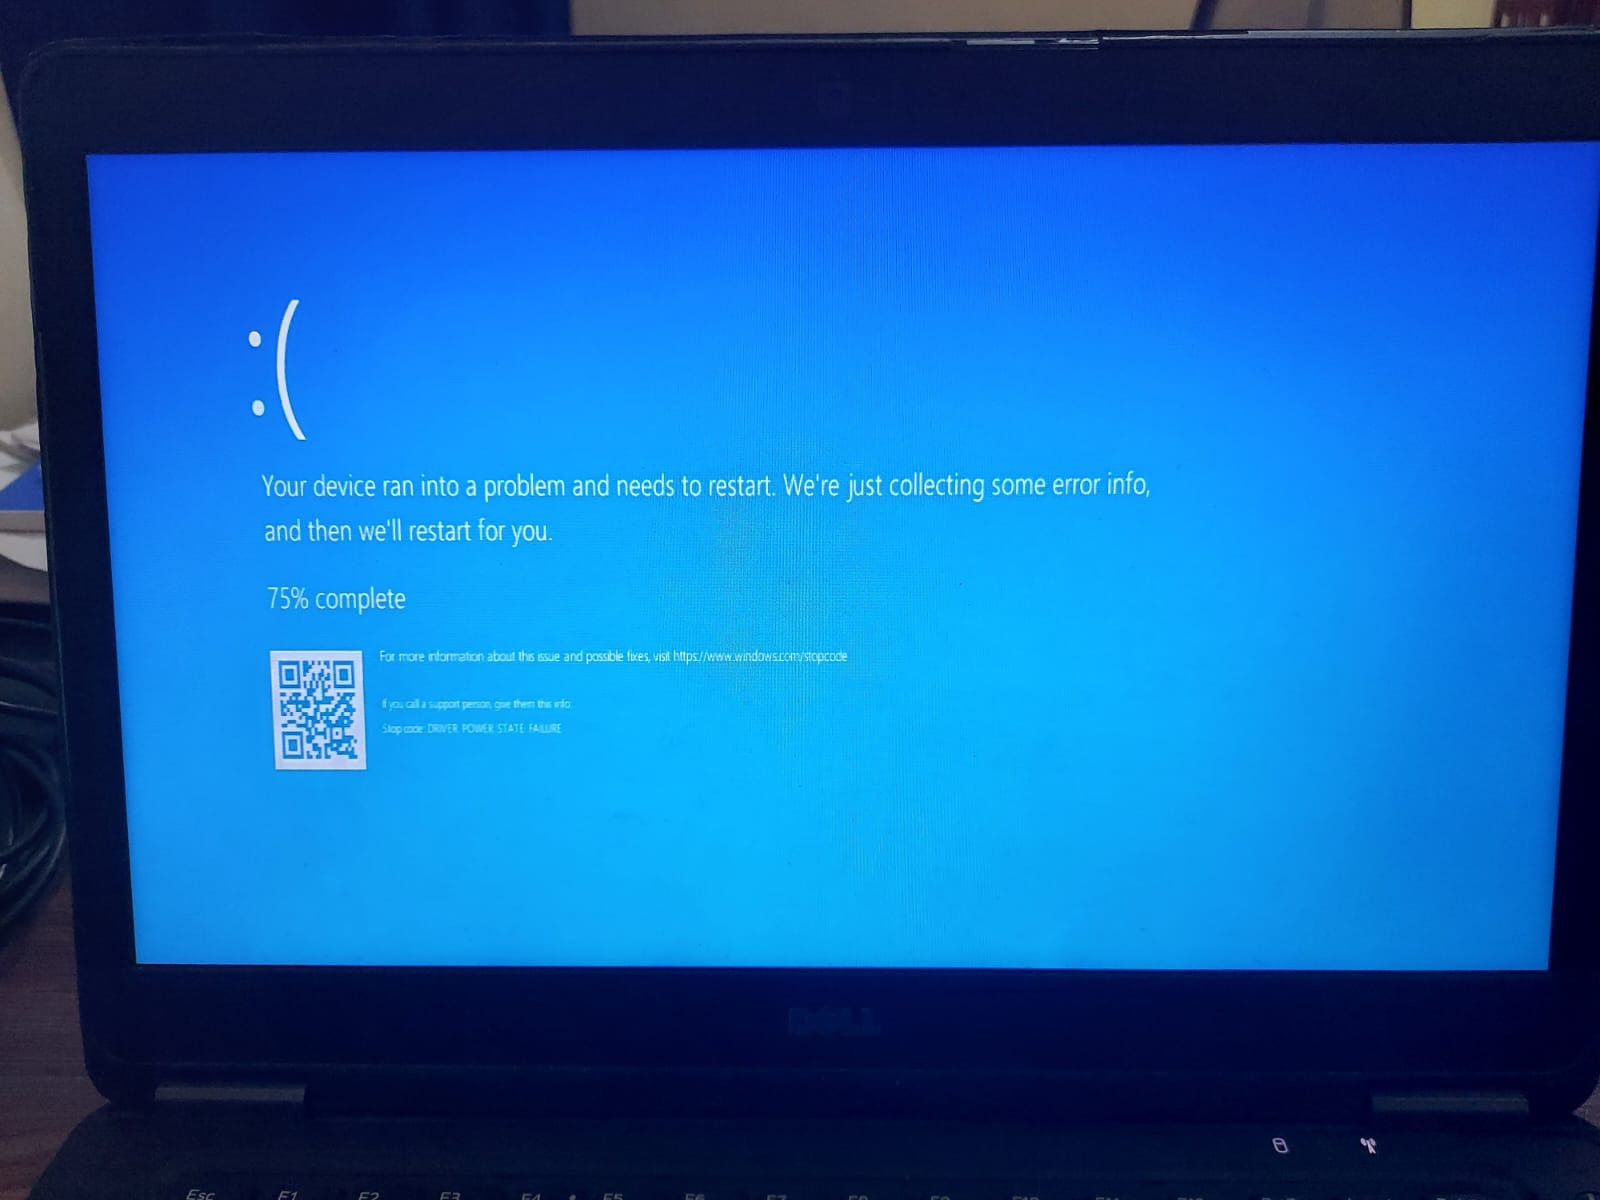

# Model Training

In [175]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(224,224,3)))    # adding convolutional layer with relu activation
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu")) # convolutional layer with maxpooling
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))  # convolutional + maxpooling + droping (acts as regularisation parameter)
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())                        
model.add(Dense(128,activation="relu"))
model.add(Dense(7, activation="softmax"))         

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 56, 56, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 28, 28, 64)      

In [176]:
from tensorflow.keras.optimizers import SGD,Adam

In [177]:
opt = Adam(lr=0.0001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

In [178]:
history = model.fit(x_train,y_train,epochs = 30 , validation_data = (x_val, y_val)) 

Epoch 1/30
98/98 [==============================] - 211s 2s/step - loss: 1.9489 - accuracy: 0.1544 - val_loss: 1.9630 - val_accuracy: 0.0995
Epoch 2/30
98/98 [==============================] - 175s 2s/step - loss: 1.9052 - accuracy: 0.2070 - val_loss: 1.8497 - val_accuracy: 0.2290
Epoch 3/30
98/98 [==============================] - 171s 2s/step - loss: 1.8210 - accuracy: 0.2931 - val_loss: 1.8083 - val_accuracy: 0.2581
Epoch 4/30
98/98 [==============================] - 165s 2s/step - loss: 1.7329 - accuracy: 0.3404 - val_loss: 1.8503 - val_accuracy: 0.2362
Epoch 5/30
98/98 [==============================] - 176s 2s/step - loss: 1.6156 - accuracy: 0.4013 - val_loss: 1.7615 - val_accuracy: 0.2969
Epoch 6/30
98/98 [==============================] - 182s 2s/step - loss: 1.5345 - accuracy: 0.4386 - val_loss: 1.8081 - val_accuracy: 0.3034
Epoch 7/30
98/98 [==============================] - 180s 2s/step - loss: 1.4315 - accuracy: 0.4826 - val_loss: 1.7717 - val_accuracy: 0.3107
Epoch 8/30
98

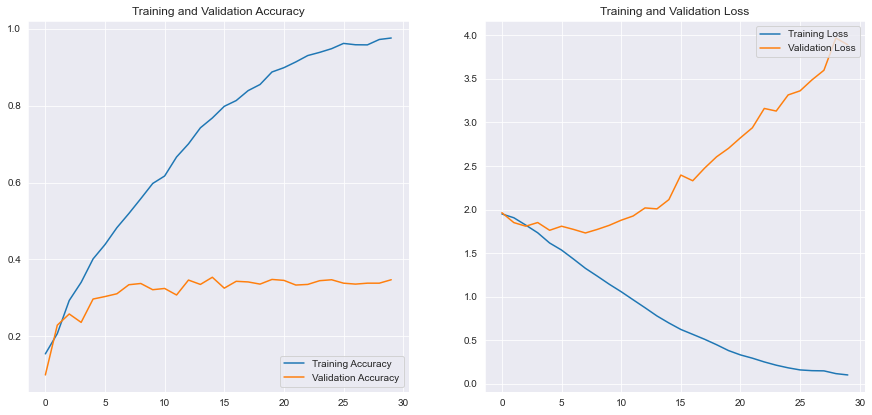

In [179]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(30)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## The art of transfer learning

In [187]:
base_model = tf.keras.applications.MobileNetV2(input_shape = (224, 224, 3), include_top = False, weights = "imagenet")

In [188]:
base_model.trainable = False # we are including this to avoid the updation of weights with our data set

In [189]:
model = tf.keras.Sequential([base_model,
                                 tf.keras.layers.GlobalAveragePooling2D(),
                                 tf.keras.layers.Dropout(0.2),
                                 tf.keras.layers.Dense(7, activation="softmax")                                     
                                ])

In [190]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train,y_train,epochs = 20 , validation_data = (x_val, y_val))

Epoch 1/20
98/98 [==============================] - 193s 2s/step - loss: 2.2520 - accuracy: 0.1404 - val_loss: 2.0402 - val_accuracy: 0.1521
Epoch 2/20
98/98 [==============================] - 144s 1s/step - loss: 2.1137 - accuracy: 0.1754 - val_loss: 1.9646 - val_accuracy: 0.1926
Epoch 3/20
98/98 [==============================] - 130s 1s/step - loss: 2.0329 - accuracy: 0.2016 - val_loss: 1.9146 - val_accuracy: 0.2209
Epoch 4/20
98/98 [==============================] - 136s 1s/step - loss: 1.9734 - accuracy: 0.2230 - val_loss: 1.8747 - val_accuracy: 0.2532
Epoch 5/20
98/98 [==============================] - 129s 1s/step - loss: 1.9234 - accuracy: 0.2469 - val_loss: 1.8317 - val_accuracy: 0.2670
Epoch 6/20
98/98 [==============================] - 133s 1s/step - loss: 1.8798 - accuracy: 0.2609 - val_loss: 1.8005 - val_accuracy: 0.2783
Epoch 7/20
98/98 [==============================] - 141s 1s/step - loss: 1.8197 - accuracy: 0.2890 - val_loss: 1.7904 - val_accuracy: 0.2864
Epoch 8/20
98

In [191]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_2   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_6 (Dropout)         (None, 1280)              0         
                                                                 
 dense_10 (Dense)            (None, 7)                 8967      
                                                                 
Total params: 2,266,951
Trainable params: 8,967
Non-trainable params: 2,257,984
_________________________________________________________________


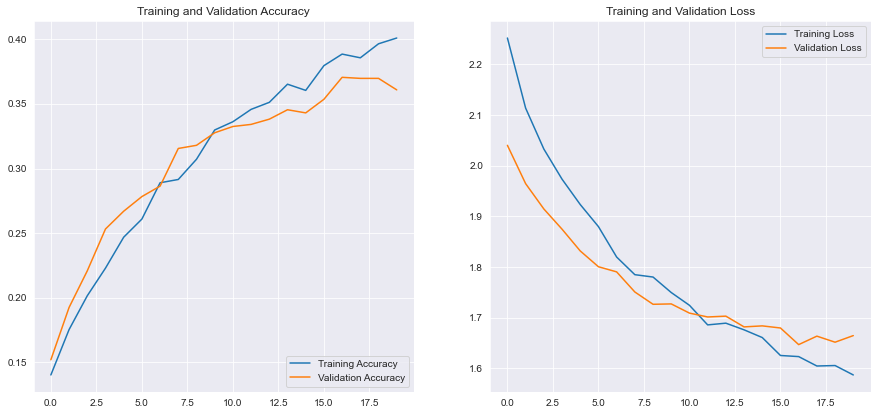

In [192]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# # Decreasing the learning rate and checking for the DL and DL with transfer learning.

In [196]:
model = Sequential() 
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(224,224,3)))    # adding convolutional layer with relu activation
model.add(MaxPool2D())  # maxpooling the convoluted laying

model.add(Conv2D(32, 3, padding="same", activation="relu")) # convolutional layer with maxpooling
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))  # convolutional + maxpooling + droping (acts as regularisation parameter)
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())                           # converting the matrix into single dimensions                 
model.add(Dense(128,activation="relu"))
model.add(Dense(7, activation="softmax"))         

In [202]:

# importing the SGD (stochastic gradient descent) and Adam (SGD optimizing algorithm) - min. memory required
from tensorflow.keras.optimizers import SGD,Adam

#Creating the model with adam optimizer, loss = sparse categorical CV as it it multiclass classification.

opt = Adam(lr=0.00001) # the learning rate , lower the values higher time, smoother curve, higher accurary(from 0.0001 to 0.000001) )
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

In [203]:
# we have changed the epochs from 30 (previous value) to 15 to reduce the time consumption
# we can see the data type of float 32 is not readable hence we convert into uint8
history = model.fit(x_train,y_train,epochs = 15 , validation_data = (x_val, y_val)) 

Epoch 1/15
98/98 [==============================] - 194s 2s/step - loss: 1.9459 - accuracy: 0.1499 - val_loss: 1.9725 - val_accuracy: 0.0890
Epoch 2/15
98/98 [==============================] - 167s 2s/step - loss: 1.9380 - accuracy: 0.1748 - val_loss: 1.9490 - val_accuracy: 0.1570
Epoch 3/15
98/98 [==============================] - 163s 2s/step - loss: 1.9292 - accuracy: 0.1962 - val_loss: 1.9494 - val_accuracy: 0.1618
Epoch 4/15
98/98 [==============================] - 162s 2s/step - loss: 1.9159 - accuracy: 0.2179 - val_loss: 1.9701 - val_accuracy: 0.1327
Epoch 5/15
98/98 [==============================] - 164s 2s/step - loss: 1.9018 - accuracy: 0.2316 - val_loss: 1.9090 - val_accuracy: 0.2201
Epoch 6/15
98/98 [==============================] - 172s 2s/step - loss: 1.8812 - accuracy: 0.2396 - val_loss: 1.8897 - val_accuracy: 0.2354
Epoch 7/15
98/98 [==============================] - 170s 2s/step - loss: 1.8641 - accuracy: 0.2475 - val_loss: 1.8797 - val_accuracy: 0.2484
Epoch 8/15
98

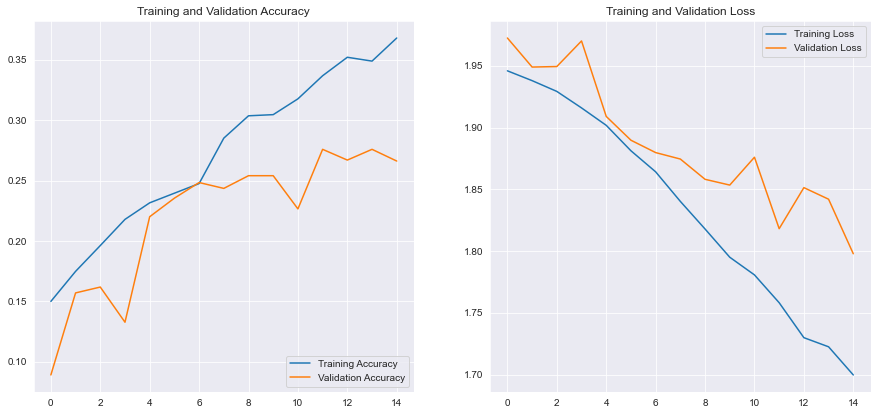

In [204]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(15) # epochs range similar to model

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Tweaks after Transfer learning

Epoch 1/20
98/98 [==============================] - 159s 1s/step - loss: 2.4916 - accuracy: 0.1455 - val_loss: 2.3676 - val_accuracy: 0.1788
Epoch 2/20
98/98 [==============================] - 130s 1s/step - loss: 2.3425 - accuracy: 0.1435 - val_loss: 2.2256 - val_accuracy: 0.1699
Epoch 3/20
98/98 [==============================] - 127s 1s/step - loss: 2.2441 - accuracy: 0.1566 - val_loss: 2.1357 - val_accuracy: 0.1650
Epoch 4/20
98/98 [==============================] - 127s 1s/step - loss: 2.1971 - accuracy: 0.1486 - val_loss: 2.0871 - val_accuracy: 0.1634
Epoch 5/20
98/98 [==============================] - 126s 1s/step - loss: 2.1822 - accuracy: 0.1439 - val_loss: 2.0581 - val_accuracy: 0.1707
Epoch 6/20
98/98 [==============================] - 126s 1s/step - loss: 2.1540 - accuracy: 0.1589 - val_loss: 2.0368 - val_accuracy: 0.1788
Epoch 7/20
98/98 [==============================] - 126s 1s/step - loss: 2.1485 - accuracy: 0.1534 - val_loss: 2.0232 - val_accuracy: 0.1796
Epoch 8/20
98

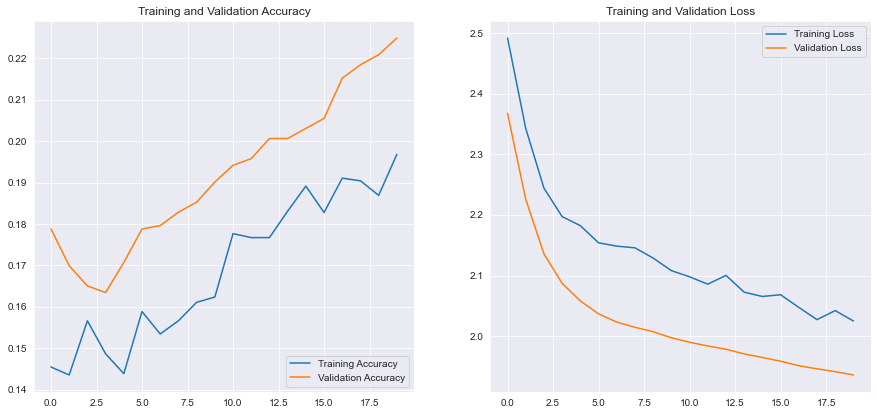

In [205]:
base_model = tf.keras.applications.MobileNetV2(input_shape = (224, 224, 3), include_top = False, weights = "imagenet")
base_model.trainable = False
model = tf.keras.Sequential([base_model,
                                 tf.keras.layers.GlobalAveragePooling2D(),
                                 tf.keras.layers.Dropout(0.2),
                                 tf.keras.layers.Dense(7, activation="softmax")                                     
                                ])

# tweaks: reduction of learning rate
base_learning_rate = 0.00001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train,y_train,epochs = 20 , validation_data = (x_val, y_val))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Epoch 1/60
98/98 [==============================] - 140s 1s/step - loss: 2.2798 - accuracy: 0.3056 - val_loss: 1.8118 - val_accuracy: 0.3786
Epoch 2/60
98/98 [==============================] - 128s 1s/step - loss: 1.7887 - accuracy: 0.4201 - val_loss: 2.0805 - val_accuracy: 0.3439
Epoch 3/60
98/98 [==============================] - 125s 1s/step - loss: 1.8032 - accuracy: 0.4325 - val_loss: 2.6402 - val_accuracy: 0.3277
Epoch 4/60
98/98 [==============================] - 126s 1s/step - loss: 1.7407 - accuracy: 0.4616 - val_loss: 1.9921 - val_accuracy: 0.3536
Epoch 5/60
98/98 [==============================] - 127s 1s/step - loss: 1.5810 - accuracy: 0.4909 - val_loss: 2.5326 - val_accuracy: 0.3552
Epoch 6/60
98/98 [==============================] - 125s 1s/step - loss: 1.6380 - accuracy: 0.4944 - val_loss: 2.3569 - val_accuracy: 0.3835
Epoch 7/60
98/98 [==============================] - 126s 1s/step - loss: 1.5284 - accuracy: 0.5142 - val_loss: 2.0001 - val_accuracy: 0.4013
Epoch 8/60
98

Epoch 59/60
98/98 [==============================] - 127s 1s/step - loss: 1.6370 - accuracy: 0.5764 - val_loss: 3.0041 - val_accuracy: 0.3786
Epoch 60/60
98/98 [==============================] - 126s 1s/step - loss: 1.5893 - accuracy: 0.5735 - val_loss: 2.9228 - val_accuracy: 0.3989


ValueError: x and y must have same first dimension, but have shapes (20,) and (60,)

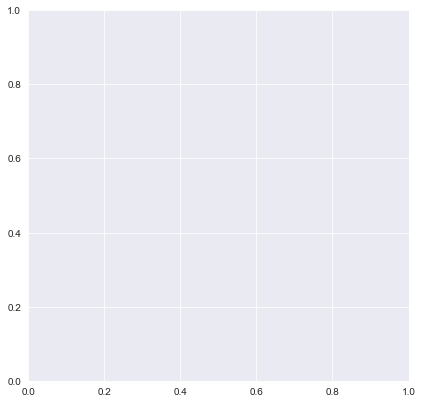

In [32]:
base_model = tf.keras.applications.MobileNetV2(input_shape = (224, 224, 3), include_top = False, weights = "imagenet")
base_model.trainable = False
model = tf.keras.Sequential([base_model,
                                 tf.keras.layers.GlobalAveragePooling2D(),
                                 tf.keras.layers.Dropout(0.2),
                                 tf.keras.layers.Dense(7, activation="softmax")                                     
                                ])

# tweaks: reduction of learning rate
base_learning_rate = 0.01
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train,y_train,epochs = 60 , validation_data = (x_val, y_val))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


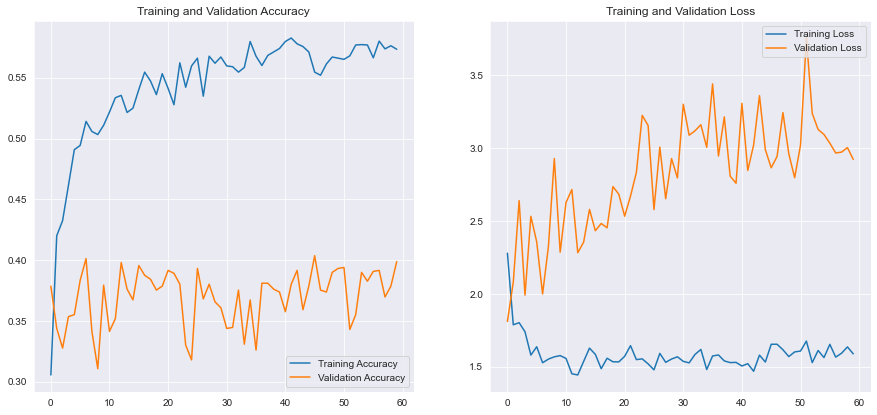

In [33]:
epochs_range = range(60)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()